In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
person_list = os.listdir('./data/train')[0:20]

## get data set
get data from preprocessed trian set. There are 20 peopel in all with each having 6 face images.

In [3]:
img = []
label = []
for face in range(len(person_list)):
    img_list = os.listdir(os.path.join('./data/train', person_list[face]))
    for i, im in enumerate(img_list):
        face_img = cv2.imread(os.path.join('./data/train/', person_list[face], im), flags=0)
        face_img = face_img.reshape((-1,))
        img.append(face_img.astype('float32'))
        label.append(face)
        if i > 4:
            break
img = np.stack(img)

In [4]:
# all label
print(label)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19]


In [5]:
# all face image with flatten vector
img = img.T
print(img)

[[ 201.   80.  132. ...,   54.   42.   42.]
 [ 216.   81.  127. ...,   54.   53.   53.]
 [ 221.   86.  125. ...,   55.   67.   67.]
 ..., 
 [ 112.  143.  172. ...,   43.   11.   11.]
 [ 112.  140.  177. ...,   42.   18.   18.]
 [ 107.  137.  184. ...,   40.   24.   24.]]


In [6]:
print(img.shape)

(9216, 120)


## get average face
add all face in their dimension and average, we can get average face.

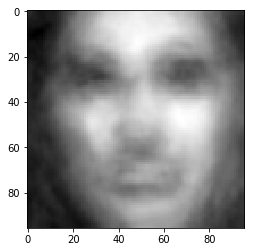

In [7]:
avg_img = np.sum(img, 1) / img.shape[1]
avg_show = avg_img.reshape((96, 96))
plt.imshow(avg_show, 'gray')

## get eigen face
All N face images substract average face, we can get $\Phi$ Matrix. Then compute covariance matrix by $C = \Phi \Phi^T$ 

In [8]:
theta = img - avg_img.reshape((-1, 1))
C = np.dot(theta.T, theta) / theta.shape[1]
d, u = np.linalg.eig(C)
v = np.dot(theta, u)

In [9]:
sort_indices = d.argsort()[::-1]
d = d[sort_indices]
v = v[:, sort_indices]

In [10]:
evalues_sum = sum(d)
evalues_count = 0
evalues_energy = 0
for e in d:
    evalues_count += 1
    evalues_energy += e / evalues_sum
    if evalues_energy >= 0.85:
        break

In [11]:
d = d[:evalues_count]
v = v[:, :evalues_count]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


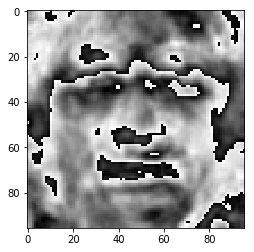

In [15]:
plt.imshow(v[:, 3].astype('uint8').reshape((96, 96)), 'gray')

In [30]:
v = v / np.linalg.norm(v, 2)

In [33]:
w = np.dot(v.T, theta)

## 测试一张脸输入哪一张最像

In [48]:
test_img = cv2.imread('./data/train/ashley tisdale/3.jpg', flags=0)

In [49]:
test_img = test_img.reshape((-1,))

In [50]:
test_img = test_img - avg_img

In [51]:
S = np.dot(v.T, test_img.reshape((-1, 1)))

In [52]:
diff = w - S
norms = np.linalg.norm(diff, axis=0)
closest_face_id = np.argmin(norms)

In [53]:
closest_face_id

42